In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/acidentes2020.csv', encoding="UTF-8", delimiter = ';', decimal=',')

In [3]:
df.head()

,Date,Weekday,City,Accident cause,Accident type,Time,UF,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
0,01/01/2020,QUA,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,05:40,PA,Sol,-1.310193,-47.744564,2008.0,38.0,Masculino
1,01/01/2020,QUA,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,05:40,PA,Sol,-1.310193,-47.744564,2008.0,14.0,Masculino
2,01/01/2020,QUA,UBERABA,Falta de Atenção à Condução,Colisão transversal,06:00,MG,Sol,-19.767475,-47.987255,NaN,NaN,Masculino
3,01/01/2020,QUA,CANUDOS,Condutor Dormindo,Saída de leito carroçável,06:00,BA,Nublado,-10.320021,-39.064252,2015.0,64.0,Masculino
4,01/01/2020,QUA,APARECIDA,Não guardar distância de segurança,Colisão traseira,10:08,SP,Sol,-22.856517,-45.231143,2015.0,57.0,Masculino


In [4]:
from sklearn.preprocessing import LabelEncoder as le

In [5]:
df.dropna(inplace=True)

In [6]:
x = df[['Date', 'Weekday', 'City', 'Time', 'UF', 'Weather', 'Latitude', 'Longitude', 'Veicule age', 'Victim age', 'Victim gender']]
y = df['Accident type'] 

In [7]:
x.head()

,Date,Weekday,City,Time,UF,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
0,01/01/2020,QUA,SAO FRANCISCO DO PARA,05:40,PA,Sol,-1.310193,-47.744564,2008.0,38.0,Masculino
1,01/01/2020,QUA,SAO FRANCISCO DO PARA,05:40,PA,Sol,-1.310193,-47.744564,2008.0,14.0,Masculino
3,01/01/2020,QUA,CANUDOS,06:00,BA,Nublado,-10.320021,-39.064252,2015.0,64.0,Masculino
4,01/01/2020,QUA,APARECIDA,10:08,SP,Sol,-22.856517,-45.231143,2015.0,57.0,Masculino
5,01/01/2020,QUA,JUATUBA,12:10,MG,Sol,-19.947864,-44.381226,2007.0,54.0,Masculino


In [8]:
y.head()

0    Saída de leito carroçável
1    Saída de leito carroçável
3    Saída de leito carroçável
4             Colisão traseira
5    Saída de leito carroçável
Name: Accident type, dtype: object

#### Label Enconder

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x = x.iloc[ :, : ].values
x[ : ,0] = label_encoder.fit_transform(x[ :, 0])
x[ : ,1] = label_encoder.fit_transform(x[ :, 1])
x[ : ,2] = label_encoder.fit_transform(x[ :, 2])
x[ : ,3] = label_encoder.fit_transform(x[ :, 3])
x[ : ,4] = label_encoder.fit_transform(x[ :, 4])
x[ : ,5] = label_encoder.fit_transform(x[ :, 5])
x[ : ,10]= label_encoder.fit_transform(x[ :, 10])

x

array([[0, 1, 1433, ..., 2008.0, 38.0, 2],
       [0, 1, 1433, ..., 2008.0, 14.0, 2],
       [0, 1, 328, ..., 2015.0, 64.0, 2],
       ...,
       [259, 5, 1458, ..., 2011.0, 58.0, 2],
       [259, 5, 1458, ..., 2011.0, 18.0, 2],
       [259, 5, 1458, ..., 2012.0, 52.0, 2]], dtype=object)

In [10]:
y = label_encoder.fit_transform(y)
y

array([14, 14, 14, ...,  8,  8,  8])

#### Balanceamento - OverSampler

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(x, y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3)
y_train

array([ 9,  3,  3, ...,  1, 10,  7])

#### Modelo

In [14]:
import xgboost as xgb

In [15]:
model = xgb.XGBClassifier()

In [16]:
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    eval_metric=["merror", "mlogloss"],
    verbose=False 
)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
pred = model.predict(X_test)

In [18]:
pred

array([12,  6,  2, ...,  3, 12,  8])

In [19]:
from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, pred)))

Accuracy: 0.7309777509018496


In [20]:
y_test

array([12,  4,  2, ...,  3, 12,  5])

In [21]:
from matplotlib import pyplot

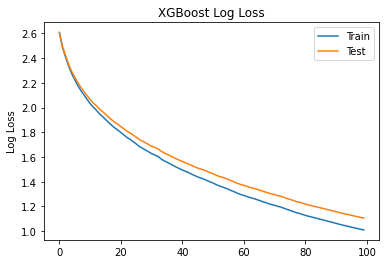

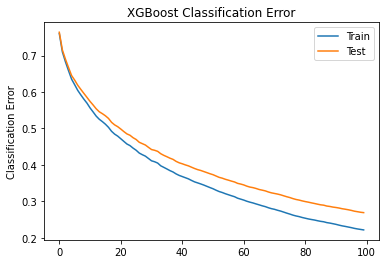

In [22]:
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#### Salvando o modelo

In [23]:
import pickle

In [25]:
filename = 'xboost_model.sav' 
pickle.dump(model, open('../model/'+ filename, 'wb'))

#### Carregando o modelo

In [26]:
model = pickle.load(open('../model/'+ filename, "rb"))